In [90]:
import pandas as pd

feature_name_df = pd.read_csv('./data/UCI_HAR_Dataset/features.txt',
header = None, delim_whitespace=True, # sep = "\s+" 와 같은 효과
names=['col_index','col_name'])
feature_name_df

,col_index,col_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


중복된 col_name이 있으니 확인

In [91]:
# col_name의 개수
feature_count = feature_name_df.groupby('col_name').count()
feature_count

,col_index
col_name,
"angle(X,gravityMean)",1
"angle(Y,gravityMean)",1
"angle(Z,gravityMean)",1
"angle(tBodyAccJerkMean),gravityMean)",1
"angle(tBodyAccMean,gravity)",1
...,...
tGravityAccMag-max(),1
tGravityAccMag-mean(),1
tGravityAccMag-min(),1


In [92]:
feature_count[feature_count.col_index > 1].head()

,col_index
col_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


중복된 col_name은 끝에 첨자 추가하기

In [93]:
# groupby의 cumcount() 메소드
# 누적된 횟수만큼 횟수 증가
feature_name_df.groupby('col_name').cumcount()

0      0
1      0
2      0
3      0
4      0
      ..
556    0
557    0
558    0
559    0
560    0
Length: 561, dtype: int64

In [94]:
feature_cum_df = pd.DataFrame({'dup_cnt':feature_name_df.groupby('col_name').cumcount()})
feature_cum_df.reset_index(inplace=True)
feature_cum_df.head()

,index,dup_cnt
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


이제 col_name 데이터프레임과 dup_cnt 데이터프레임을 합쳐주면 됨

In [95]:
new_df = pd.merge(feature_name_df.reset_index(),feature_cum_df)
# feature_name_df에 index열이 없던 상태라서
del new_df['index']

첨자 붙이기

In [96]:
new_df.col_name = new_df.apply(lambda r: r.col_name + '_' +  str(r.dup_cnt) if r.dup_cnt > 0 else r.col_name, axis = 1)

In [97]:
new_df.col_name.to_numpy()[:10]

array(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X'], dtype=object)

In [98]:
import pandas as pd
X_train = pd.read_csv('./data/UCI_HAR_Dataset/train/X_train.txt',
header = None, delim_whitespace=True, names = new_df.col_name.to_numpy())
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [99]:
X_train.isnull().sum().sum()

0

In [100]:
y_train = pd.read_csv('./data/UCI_HAR_Dataset/train/y_train.txt',
header = None, delim_whitespace=True, names =['action'])
y_train

,action
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [101]:
y_train.isnull().sum().sum()

0

In [102]:
X_test = pd.read_csv('./data/UCI_HAR_Dataset/test/X_test.txt',
header = None, delim_whitespace=True, names = new_df.col_name.to_numpy())
X_test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [103]:
y_test = pd.read_csv('./data/UCI_HAR_Dataset/test/y_test.txt',
header = None, delim_whitespace=True, names =['action'])
y_test

,action
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


### 결정 트리
- 오차 행렬은 로지스틱 회귀, 즉 범주가 0과 1일때만 사용

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f'결정 트리 예측 정확도: {acc:.4f}')

결정 트리 예측 정확도: 0.8096


- 최적 파라미터

In [106]:
# 파라미터는 max_depth와 min_samples_leaf를 변화시켜 학습하고
parameters = {
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [2, 16, 20, 24],
     # 'min_samples_leaf': [2, 16, 20, 24]
}
# 이거 combinationatory 연산이라 위처럼 하면 4 x 4 x 4 x 데이터셋 크기만큼의 데이터
# 엄청 오래 걸림_

In [107]:
from sklearn.model_selection import GridSearchCV
grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=5, scoring='accuracy')
grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_split': [2, 16, 20, 24]},
             scoring='accuracy')

In [108]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 8, 'min_samples_split': 16}
GridSearchCV 최고 정확도: 0.8549


In [119]:
# 결과 데이터프레임으로 볼 수 있음
df = pd.DataFrame(grid_dtree.cv_results_)
df = df[['param_max_depth', 'param_min_samples_split', 'mean_test_score']]
df

,param_max_depth,param_min_samples_split,mean_test_score
0,6,2,0.850791
1,6,16,0.847662
2,6,20,0.847526
3,6,24,0.846575
4,8,2,0.851069
5,8,16,0.854879
6,8,20,0.852567
7,8,24,0.851342
8,10,2,0.851209
9,10,16,0.852705


GridSearchCV에서 얻은 최적 모델

In [121]:
best_dt_clf = grid_dtree.best_estimator_
pred = best_dt_clf.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f'테스트 셋에 대한 정확도: {acc:.4f}')

테스트 셋에 대한 정확도: 0.8717


Feature 중요도

In [123]:
feature_importances = pd.Series(best_dt_clf.feature_importances_, index=new_df.col_name.to_numpy())
feature_importances

tBodyAcc-mean()-X                       0.000000
tBodyAcc-mean()-Y                       0.000000
tBodyAcc-mean()-Z                       0.000000
tBodyAcc-std()-X                        0.000000
tBodyAcc-std()-Y                        0.001752
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.001291
angle(tBodyGyroJerkMean,gravityMean)    0.000000
angle(X,gravityMean)                    0.000989
angle(Y,gravityMean)                    0.139001
angle(Z,gravityMean)                    0.002987
Length: 561, dtype: float64

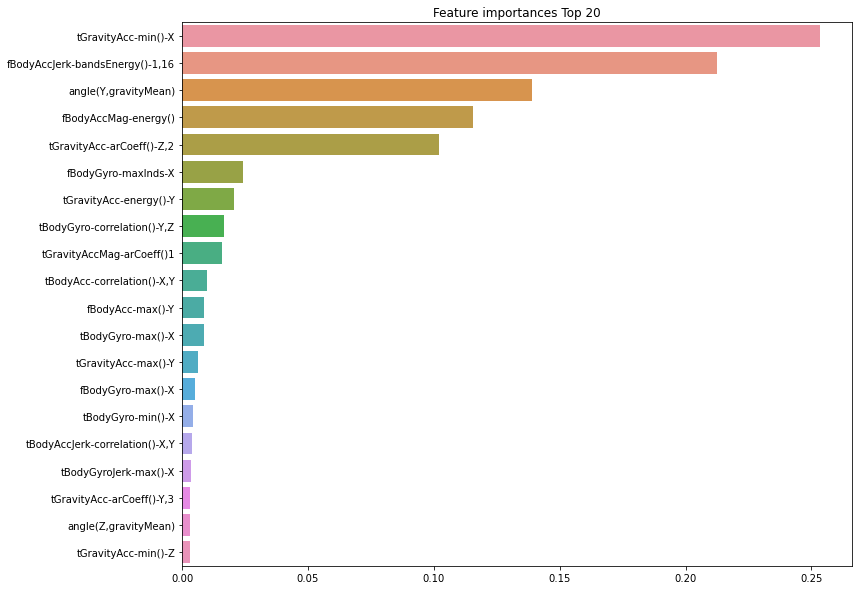

In [125]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
top20_feature = feature_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(12,10))
plt.title('Feature importances Top 20')
sns.barplot(x=top20_feature, y=top20_feature.index)
plt.show()